## Tracing Divergence: A Comparative Performance Analysis of India, Pakistan, and Bangladesh based on Key UN SDGs


### Motivation:
#### During my time at UBC and Yale, I developed a deeper understanding of the UN Sustainable Development Goals (SDGs). However, I realized that while growing up in India, SDGs rarely came to mind, leaving me curious about how India and its neighbors perform on these critical metrics. This project focuses on India, Pakistan, and Bangladesh—countries that share deep historical, cultural, and social ties, having once been united under British rule. Using the World Bank Open Dataset, I aim to compare their progress on key SDGs by analyzing the Overall SDG Index Score and specific goals like No Poverty (SDG 1), Zero Hunger (SDG 2), and Good Health & Wellbeing (SDG 3). Additionally, the project seeks insights from various indicators such as Prevalence of Undernourishment (% of population) w.r.t SDG 2, Life Expectancy at Birth w.r.t SDG 3, etc. to understand the nuances of each country's development trajectory.


In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime

In [2]:
# Loading the data into a data frame

data = pd.read_csv('Final Dataset.csv')

In [3]:
data.head()

,Country Code,Country,Year,Total Population,"GDP per capita, PPP (current international $)",Poverty headcount ratio at national poverty lines (% of population),Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),Multidimensional poverty headcount ratio (World Bank) (% of population),Prevalence of undernourishment (% of population),"Prevalence of stunting, height for age (% of children under 5)",...,n_sdg16_rsf,n_sdg16_justice,n_sdg16_admin,n_sdg16_exprop,n_sdg17_govex,n_sdg17_oda,n_sdg17_govrev,n_sdg17_cohaven,n_sdg17_statperf,n_sdg17_multilat
0,BGD,Bangladesh,2000,129193327,1574.525647,NaN,71.9,NaN,NaN,51.1,...,37,45,44,16,18,NaN,0,100,42,84
1,BGD,Bangladesh,2001,131670484,1659.895464,NaN,NaN,NaN,15.6,53.2,...,37,45,44,16,17,NaN,0,100,42,84
2,BGD,Bangladesh,2002,134139826,1718.083880,NaN,NaN,NaN,14.8,51.4,...,37,45,44,16,17,NaN,0,100,42,84
3,BGD,Bangladesh,2003,136503206,1803.270265,NaN,NaN,NaN,14.4,47.8,...,37,45,44,16,17,NaN,0,100,42,84
4,BGD,Bangladesh,2004,138789725,1916.679795,NaN,NaN,NaN,13.9,50.5,...,37,45,44,16,16,NaN,0,100,42,84


### Historical Performance Comparison

#### As a very first step of the analysis, I want to compare how the 3 countries have been performing since 2000 both at an overall SDG Index Score and at the individual SDG Index levels. This initial step is crucial as it highlights the trajectories and comparative performance of each country, revealing patterns of growth or stagnation. By identifying these trends, I am hoping to pinpoint areas that require deeper investigation, such as examining specific indicators like Life Expectancy at Birth and the Prevalence of Undernourishment, to gain more nuanced insights into each country's development challenges and achievements.

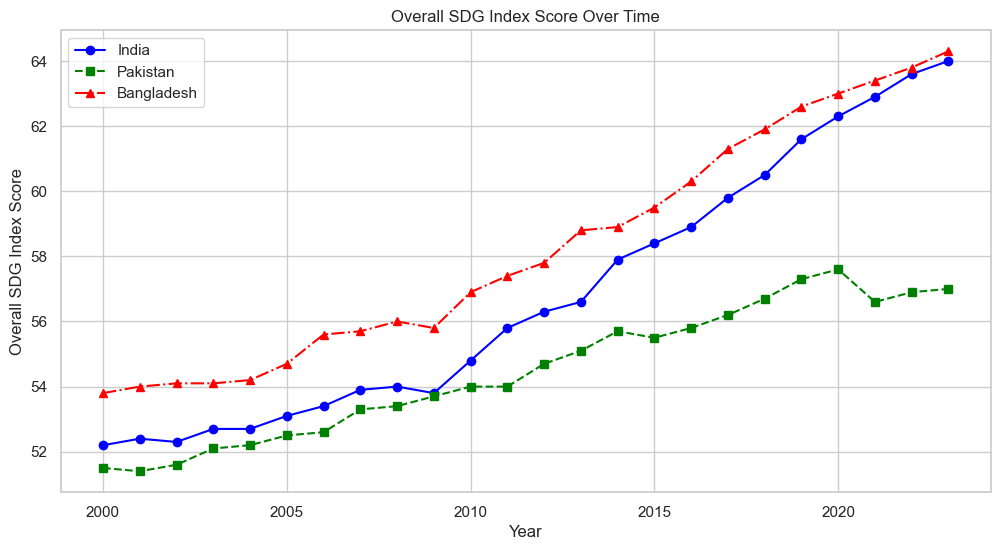

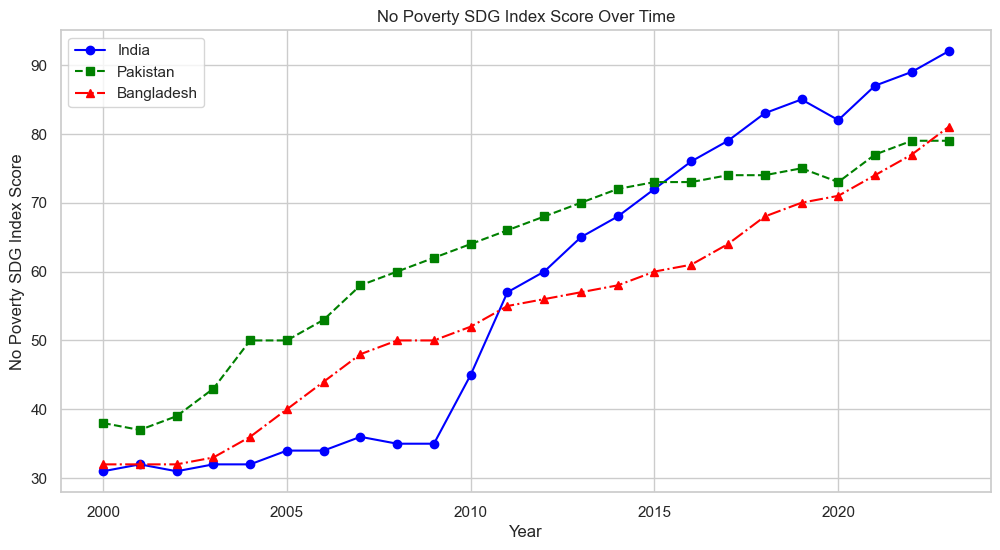

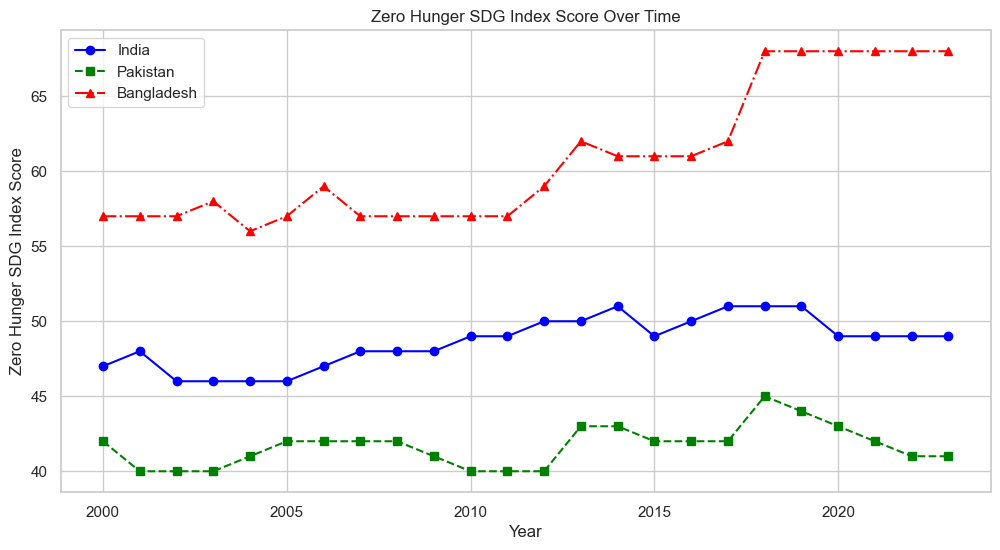

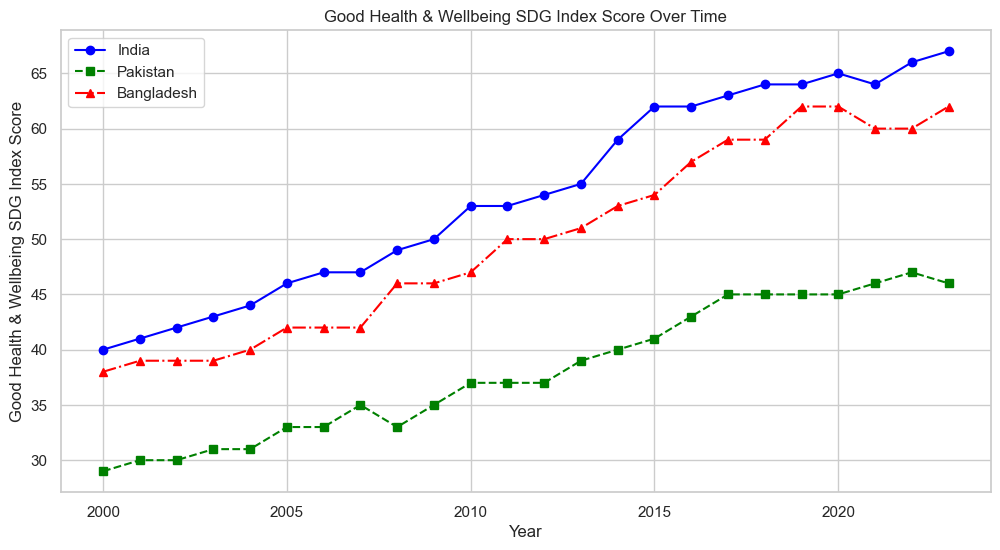

In [4]:
# Filter the data to include only the relevant columns for analysis
filtered_data = data[['Country', 'Year', 'SDG Index Score', 'goal1', 'goal2', 'goal3']]

# Set the style for the plots
sns.set(style='whitegrid')

# Define styles for each country
styles = {
    'India': {'color': 'blue', 'linestyle': '-', 'marker': 'o'},
    'Pakistan': {'color': 'green', 'linestyle': '--', 'marker': 's'},
    'Bangladesh': {'color': 'red', 'linestyle': '-.', 'marker': '^'}
}

# Plotting Overall SDG Index Score for all countries
plt.figure(figsize=(12, 6))
for country in ['India', 'Pakistan', 'Bangladesh']:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['SDG Index Score'], 
             label=f'{country}', 
             color=styles[country]['color'], 
             linestyle=styles[country]['linestyle'], 
             marker=styles[country]['marker'])

plt.title('Overall SDG Index Score Over Time')
plt.xlabel('Year')
plt.ylabel('Overall SDG Index Score')
plt.legend()
plt.show()

# Plotting No Poverty SDG Index Score for all countries
plt.figure(figsize=(12, 6))
for country in ['India', 'Pakistan', 'Bangladesh']:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['goal1'], 
             label=f'{country}', 
             color=styles[country]['color'], 
             linestyle=styles[country]['linestyle'], 
             marker=styles[country]['marker'])

plt.title('No Poverty SDG Index Score Over Time')
plt.xlabel('Year')
plt.ylabel('No Poverty SDG Index Score')
plt.legend()
plt.show()

# Plotting Zero Hunger SDG Index Score for all countries
plt.figure(figsize=(12, 6))
for country in ['India', 'Pakistan', 'Bangladesh']:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['goal2'], 
             label=f'{country}', 
             color=styles[country]['color'], 
             linestyle=styles[country]['linestyle'], 
             marker=styles[country]['marker'])

plt.title('Zero Hunger SDG Index Score Over Time')
plt.xlabel('Year')
plt.ylabel('Zero Hunger SDG Index Score')
plt.legend()
plt.show()

# Plotting Good Health & Wellbeing SDG Index Score for all countries
plt.figure(figsize=(12, 6))
for country in ['India', 'Pakistan', 'Bangladesh']:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['goal3'], 
             label=f'{country}', 
             color=styles[country]['color'], 
             linestyle=styles[country]['linestyle'], 
             marker=styles[country]['marker'])

plt.title('Good Health & Wellbeing SDG Index Score Over Time')
plt.xlabel('Year')
plt.ylabel('Good Health & Wellbeing SDG Index Score')
plt.legend()
plt.show()

### Insights

#### Below are some of the key insights that stood out from the above analysis:
##### * Key Patterns: Bangladesh generally shows the most consistent progress across goals.
##### * Key Patterns: Pakistan consistently trails behind in most metrics, indicating systematic challenges.
##### * Overall SDG Index Score: The performance gap between Pakistan and its neighbors has generally widened since 2015.
##### * No Poverty (SDG 1): India demonstrates dramatic improvements in poverty reduction, rising from ~31 to 92 points. Notable turning point occurs around 2010 when India's score began to rise sharply. 
##### * Zero Hunger (SDG 2): The gap between Bangladesh and the other two countries has widened since 2015.
##### * Good Health & Wellbeing (SDG 3): All three countries show positive trends, but with varying rates of progress.

### Correlational Analysis

#### Given the above insights the next logical step is to test how indicators such as GDP per capita and SDG scores can shed some light on what drives the improvement. 


GDP Per Capita vs SDG Scores:


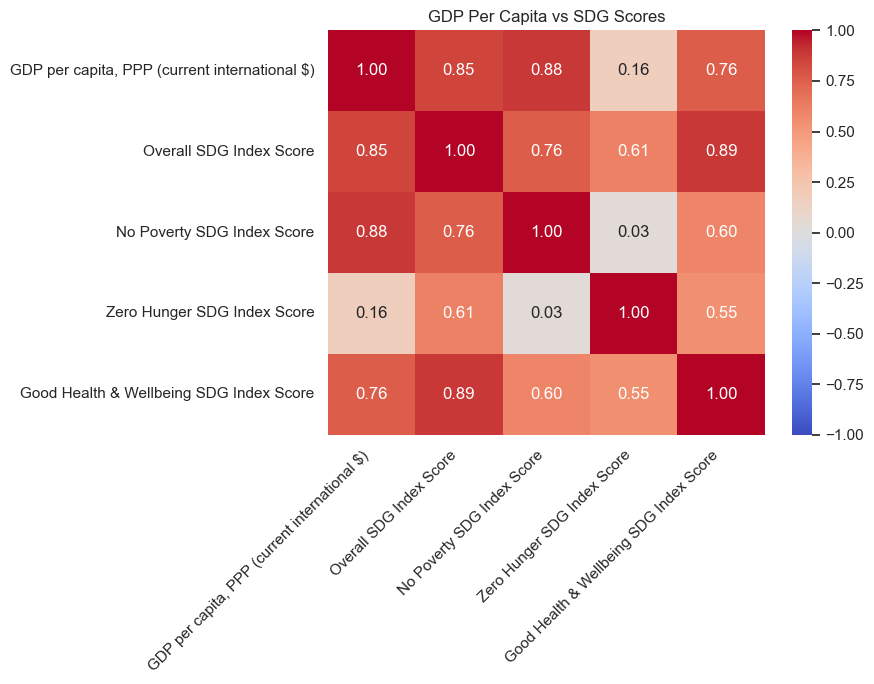

Correlation between GDP per capita, PPP  and Overall SDG Index Score: 0.846
Correlation between GDP per capita, PPP  and No Poverty SDG Index Score: 0.884
Correlation between GDP per capita, PPP  and Zero Hunger SDG Index Score: 0.165
Correlation between GDP per capita, PPP  and Good Health & Wellbeing SDG Index Score: 0.759

Poverty Indicators vs SDG Scores:


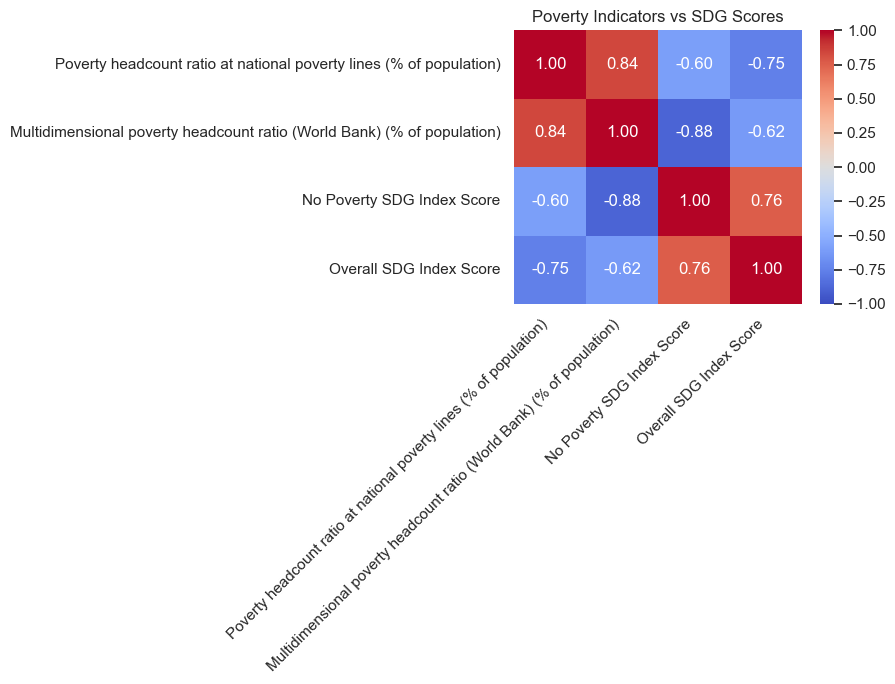

Correlation between Poverty headcount ratio at national poverty lines  and No Poverty SDG Index Score: -0.598
Correlation between Poverty headcount ratio at national poverty lines  and Overall SDG Index Score: -0.750
Correlation between Multidimensional poverty headcount ratio  and No Poverty SDG Index Score: -0.885
Correlation between Multidimensional poverty headcount ratio  and Overall SDG Index Score: -0.619

Nutrition Indicators vs Zero Hunger SDG Index Score:


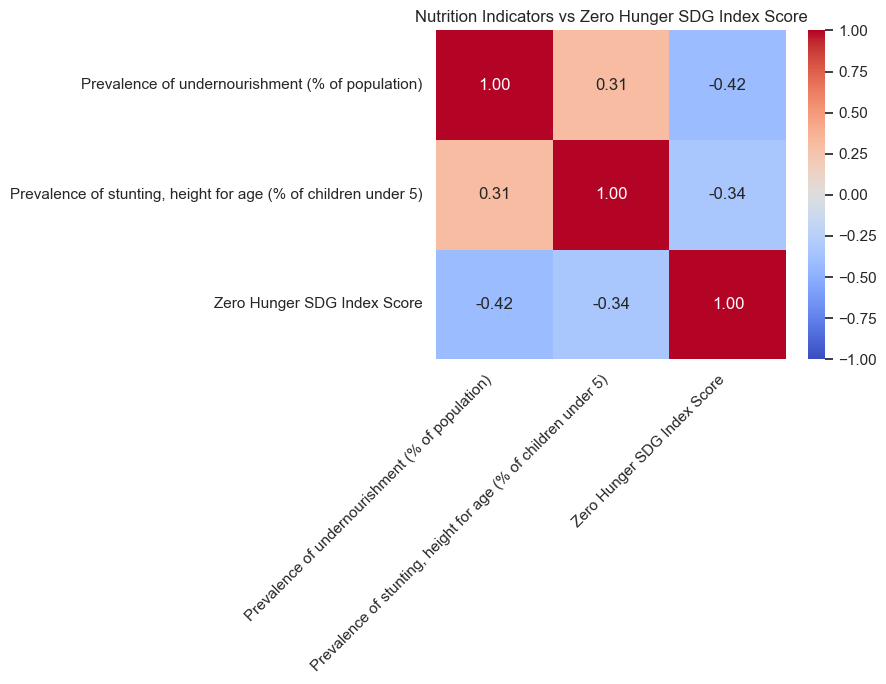

Correlation between Prevalence of undernourishment  and Zero Hunger SDG Index Score: -0.416
Correlation between Prevalence of stunting, height for age  and Zero Hunger SDG Index Score: -0.340

Health Indicators vs Good Health & Wellbeing SDG Index Score:


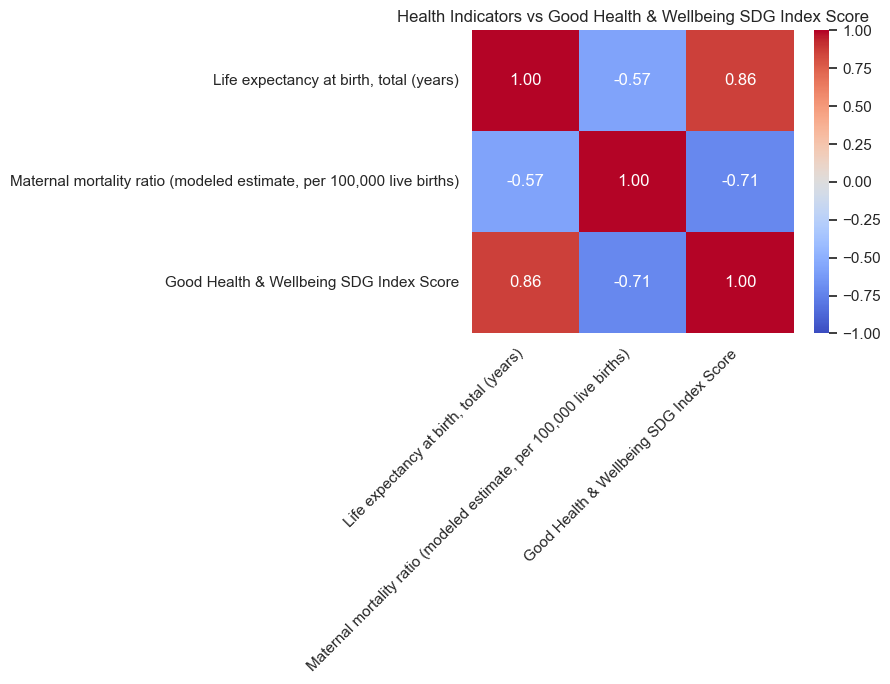

Correlation between Life expectancy at birth, total  and Good Health & Wellbeing SDG Index Score: 0.864
Correlation between Maternal mortality ratio  and Good Health & Wellbeing SDG Index Score: -0.712


In [5]:
# Create correlation pairs
correlations = {
    'GDP vs SDGs': {
        'x': 'GDP per capita, PPP (current international $)',
        'y': ['Overall SDG Index Score', 'No Poverty SDG Index Score', 
              'Zero Hunger SDG Index Score', 'Good Health & Wellbeing SDG Index Score'],
        'title': 'GDP Per Capita vs SDG Scores'
    },
    'Poverty vs Goals': {
        'x': ['Poverty headcount ratio at national poverty lines (% of population)',
              'Multidimensional poverty headcount ratio (World Bank) (% of population)'],
        'y': ['No Poverty SDG Index Score', 'Overall SDG Index Score'],
        'title': 'Poverty Indicators vs SDG Scores'
    },
    'Nutrition vs Goal 2': {
        'x': ['Prevalence of undernourishment (% of population)',
              'Prevalence of stunting, height for age (% of children under 5)'],
        'y': 'Zero Hunger SDG Index Score',
        'title': 'Nutrition Indicators vs Zero Hunger SDG Index Score'
    },
     'Health vs Goal 3': {
        'x': ['Life expectancy at birth, total (years)', 
              'Maternal mortality ratio (modeled estimate, per 100,000 live births)'],
        'y': 'Good Health & Wellbeing SDG Index Score',
        'title': 'Health Indicators vs Good Health & Wellbeing SDG Index Score'
    }
}

# Create column name mapping
column_mapping = {
    'SDG Index Score': 'Overall SDG Index Score',
    'goal1': 'No Poverty SDG Index Score',
    'goal2': 'Zero Hunger SDG Index Score',
    'goal3': 'Good Health & Wellbeing SDG Index Score'
}

# Copy the data and rename columns
data_renamed = data.copy()
data_renamed = data_renamed.rename(columns=column_mapping)

# Calculate and display correlations
for analysis, params in correlations.items():
    print(f"\n{params['title']}:")
    
    if isinstance(params['x'], list):
        x_vars = params['x']
    else:
        x_vars = [params['x']]
        
    if isinstance(params['y'], list):
        y_vars = params['y']
    else:
        y_vars = [params['y']]
        
    # Create correlation matrix
    vars_to_correlate = x_vars + y_vars
    correlation_matrix = data_renamed[vars_to_correlate].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(9, 7))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                vmin=-1, 
                vmax=1, 
                center=0,
                fmt='.2f')
    plt.title(params['title'])
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Print correlation values
    for x in x_vars:
        for y in y_vars:
            correlation = data_renamed[x].corr(data_renamed[y])
            print(f"Correlation between {x.split('(')[0]} and {y}: {correlation:.3f}")


### Insights

#### Below are some of the key insights that stood out from the above analysis:
##### * GDP Per Capita vs SDG Scores: Strong correlation between GDP per capita, an economic indicator, and Overall SDG Index Score (0.85) & 
##### No Poverty SDG Index Score (0.88), suggests economic growth generally supports sustainable development and can be an effective indicator 
##### of poverty reduction.
##### * GDP Per Capita vs SDG Scores: Weak correlation (0.16) with Zero Hunger SDG Index Score, indicating that economic growth alone may not 
##### address food security challenges

##### * Nutrition Indicators vs Zero Hunger SDG Index Score: Moderate negative correlations for undernourishment (-0.42) and stunting (-0.34) 
##### with Zero Hunger Score suggest complex nutrition challenges. Suggesting that improving the Zero Hunger Score involves more factors than 
##### just reducing undernourishment and stunting. This suggests that policies focusing solely on reducing undernourishment or stunting 
##### may not be sufficient to achieve significant improvements in Zero Hunger goals.

##### * Health Indicators vs Good Health & Wellbeing SDG Index Score: Maternal mortality has a strong negative correlation (-0.71) with the
##### Health SDG Score, demonstrating that reducing maternal deaths is a key health indicator. This relationship implies that reducing maternal deaths ##### is closely linked to improvements in healthcare quality, access, and infrastructure. 

### Projecting Goal Achievements

#### Given the data trends of the last two decades, none of the 3 countries are enroute to achieve the SDG goals by the UN target year of 2030. So, using the relevant indicators identified in the previous step I want to identify the realistic timelines for achieving the goals.

#### Projected Year to Achieve Zero Hunger SDG

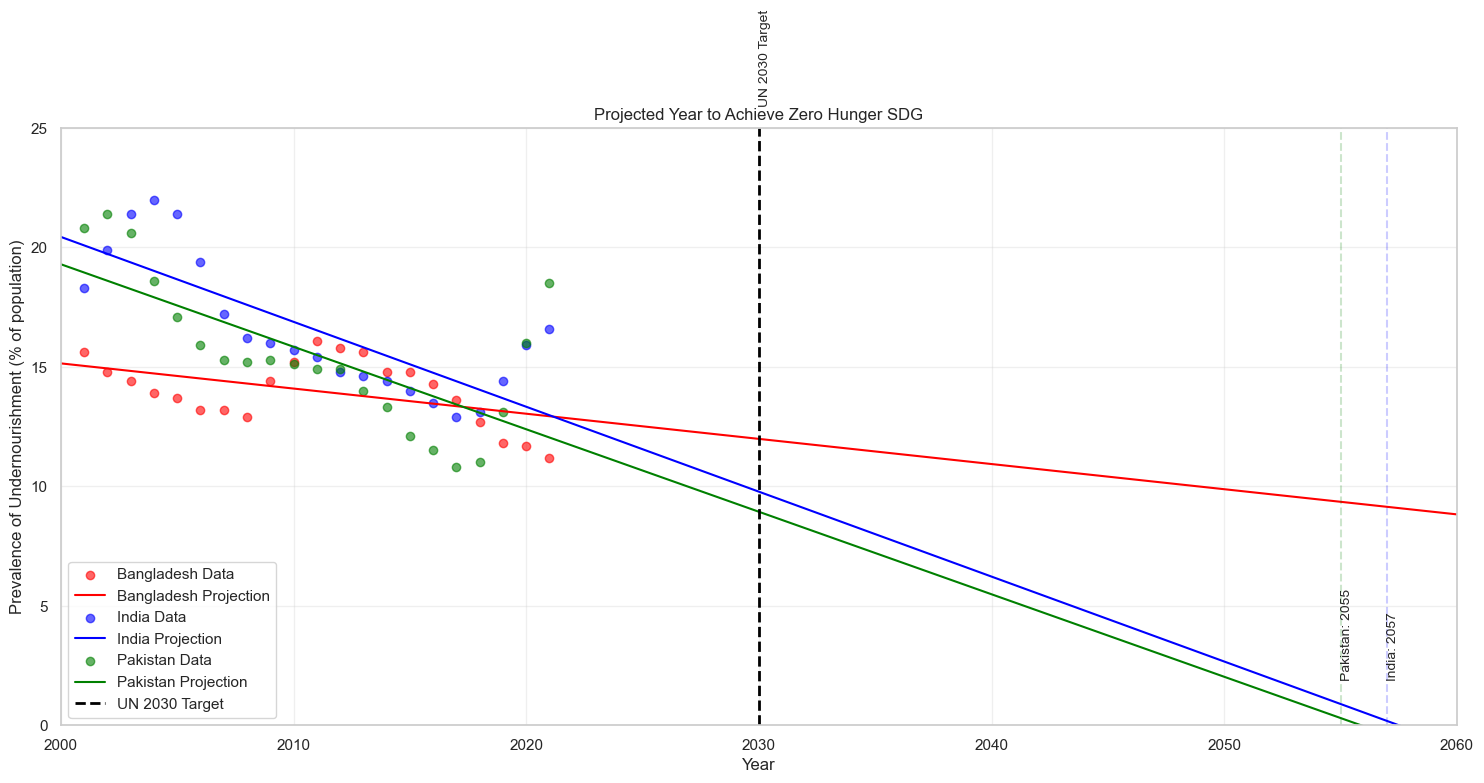


Projected Years to Achieve Zero Hunger SDG:
Bangladesh: 2143
India: 2057
Pakistan: 2055


In [6]:
# Filter relevant columns
columns = ['Country', 'Year', 'Prevalence of undernourishment (% of population)']
data_filtered = data[columns].dropna()

plt.figure(figsize=(15, 8))
colors = {'Bangladesh': 'red', 'India': 'blue', 'Pakistan': 'green'}
target_years = {}

for country in ['Bangladesh', 'India', 'Pakistan']:
    country_data = data_filtered[data_filtered['Country'] == country]
    
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Prevalence of undernourishment (% of population)'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    if abs(model.coef_[0]) < 1e-10:
        target_year = float('inf')
    else:
        target_year = int(-model.intercept_ / model.coef_[0])
        if target_year < 2000:
            target_year = float('inf')
    
    target_years[country] = target_year
    
    plt.scatter(X, y, color=colors[country], label=f'{country} Data', alpha=0.6)
    
    x_range = np.linspace(2000, 2060, 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    
    plt.plot(x_range, y_pred, color=colors[country], linestyle='-', 
             label=f'{country} Projection')
    
    if target_year != float('inf'):
        plt.annotate(f'{country}: {target_year}', 
                    xy=(target_year, 0),
                    xytext=(target_year, 2),
                    fontsize=10,
                    rotation=90)

plt.axvline(x=2030, color='black', linestyle='--', linewidth=2, 
            label='UN 2030 Target')
plt.annotate('UN 2030 Target', 
            xy=(2030, 25),
            xytext=(2030, 26),
            fontsize=10,
            rotation=90)

plt.ylabel('Prevalence of Undernourishment (% of population)')
plt.xlabel('Year')
plt.title('Projected Year to Achieve Zero Hunger SDG')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(2000, 2060)
plt.ylim(0, 25)

for country, year in target_years.items():
    if year != float('inf'):
        plt.axvline(x=year, color=colors[country], linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

print("\nProjected Years to Achieve Zero Hunger SDG:")
for country, year in target_years.items():
    if year != float('inf'):
        print(f"{country}: {year}")
    else:
        print(f"{country}: Will not reach target with current trend")

## Insights

##### Zero Hunger SDG Goal: Based on the regression analysis and current trends, none of the three South Asian nations - Bangladesh, India, and Pakistan - are on track to achieve the Zero Hunger SDG by the UN's 2030 target. The analysis of undernourishment and stunting indicators reveals significantly delayed timelines. Bangladesh exhibits the most concerning pattern with an almost flat regression line, starting from about 15% in 2000 and showing minimal decline. India shows a steady decline from around 20% in 2000, with consistent progress despite some fluctuations in the data points Pakistan started at similar levels to India (around 20%) in 2000 but shows more pronounced improvement in the early years, though its projection suggests a slightly slower rate of progress in later years than initially indicate

##### Based on this, the data reveals concerning timelines for achieving zero hunger:
###### Pakistan is expected to reach the target by 2055
###### India projects to achieve it by 2057
###### Bangladesh will take until 2143 to reach the 2143.

#### Projected Year to Good Health & Well-Being SDG Goals

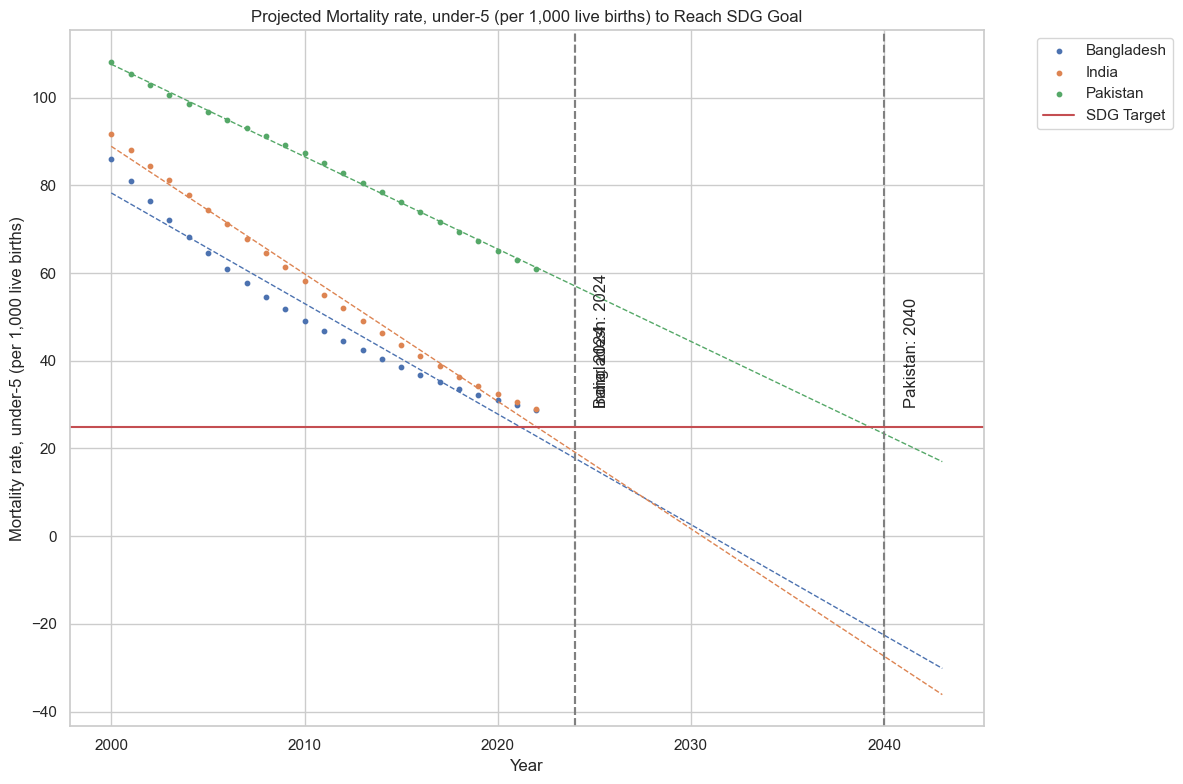

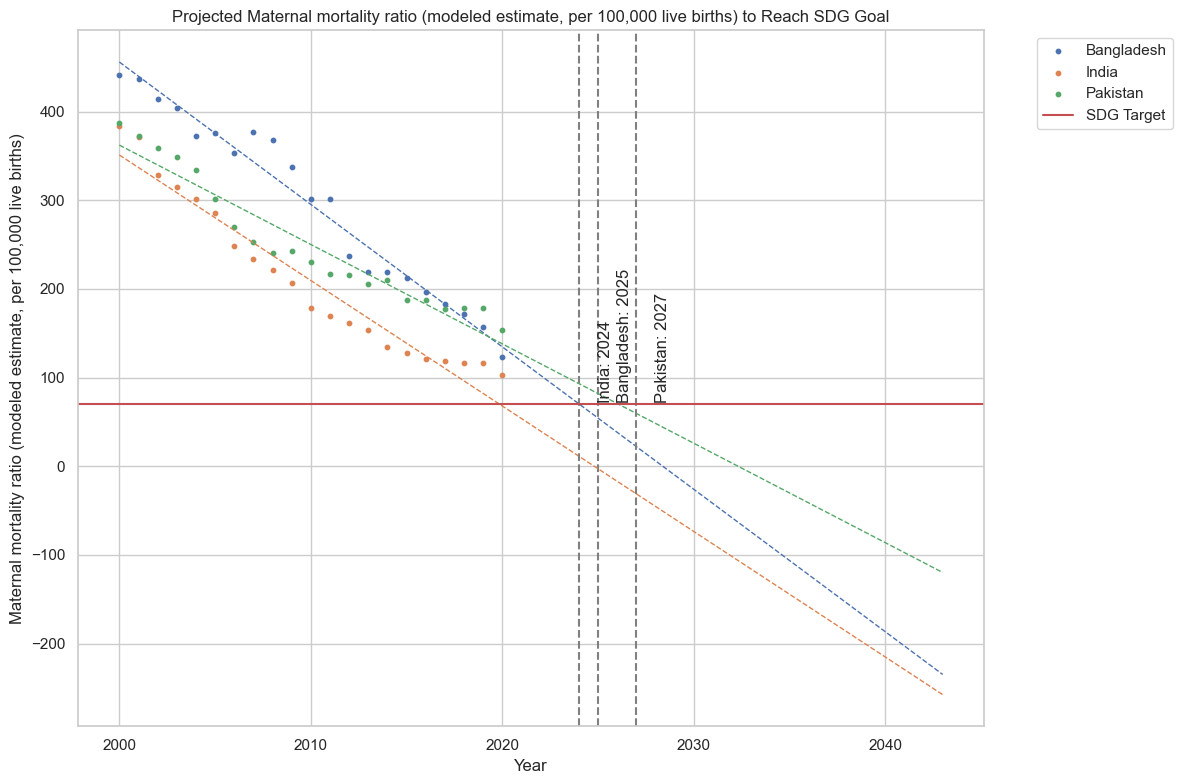

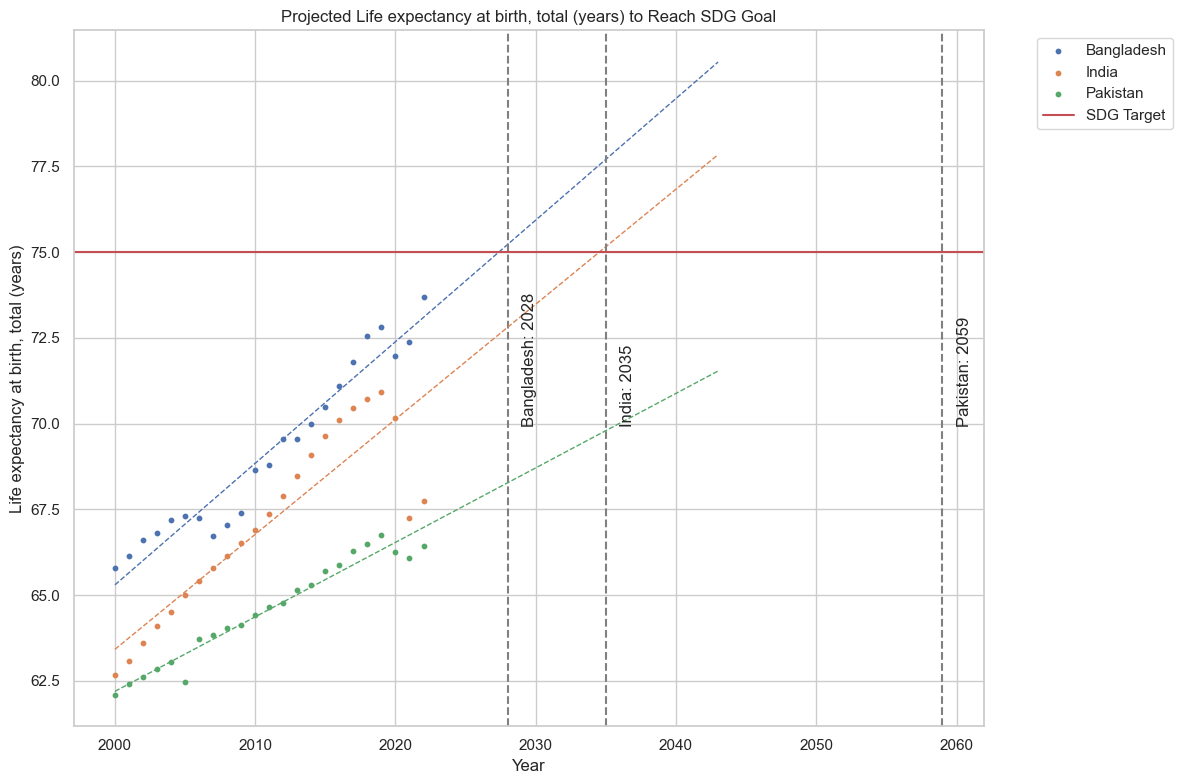


Projected years to reach SDG Goals for Bangladesh:
The target year for Mortality rate, under-5 (per 1,000 live births) in Bangladesh is 2024
The target year for Maternal mortality ratio (modeled estimate, per 100,000 live births) in Bangladesh is 2025
The target year for Life expectancy at birth, total (years) in Bangladesh is 2028

Projected years to reach SDG Goals for India:
The target year for Mortality rate, under-5 (per 1,000 live births) in India is 2024
The target year for Maternal mortality ratio (modeled estimate, per 100,000 live births) in India is 2024
The target year for Life expectancy at birth, total (years) in India is 2035

Projected years to reach SDG Goals for Pakistan:
The target year for Mortality rate, under-5 (per 1,000 live births) in Pakistan is 2040
The target year for Maternal mortality ratio (modeled estimate, per 100,000 live births) in Pakistan is 2027
The target year for Life expectancy at birth, total (years) in Pakistan is 2059


In [11]:
# UN defined SDG target values
mortality_rate_target = 25  # per 1,000 live births
maternal_mortality_target = 70  # per 100,000 live births
life_expectancy_target = 75  # years

# Prepare the data
data['Year'] = pd.to_datetime(data['Year'], format='%Y').dt.year
countries = data['Country'].unique()

# Function to predict year to reach SDG goal
def predict_sdg_year(country_data, y_column, target, direction='decrease'):
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data[y_column].values
    
    # Remove NaN values
    valid_indices = ~np.isnan(y)
    X = X[valid_indices]
    y = y[valid_indices]
    
    if len(y) == 0:
        return None

    # Linear regression
    reg = LinearRegression().fit(X, y)
    
    # Predict future years until the target is met
    current_year = datetime.now().year
    while True:
        pred = reg.predict([[current_year]])[0]
        if (direction == 'decrease' and pred <= target) or (direction == 'increase' and pred >= target):
            return current_year
        current_year += 1
        if current_year > datetime.now().year + 100:  # Limit prediction to 100 years in the future
            return None
    
    return None

# Plotting function for each indicator with vertical lines and annotations
def plot_indicator(data, indicator, target, direction='decrease'):
    plt.figure(figsize=(12, 8))
    
    for country in countries:
        country_data = data[data['Country'] == country].sort_values('Year')
        country_data = country_data.dropna(subset=[indicator])
        
        # Predict the year to reach the goal
        goal_year = predict_sdg_year(country_data, indicator, target, direction)
        
        plt.scatter(country_data['Year'], country_data[indicator], label=country, s=10)
        
        # Regression line
        X = country_data['Year'].values.reshape(-1, 1)
        y = country_data[indicator].values
        reg = LinearRegression().fit(X, y)
        X_future = np.array(range(country_data['Year'].min(), datetime.now().year + 20)).reshape(-1, 1)
        plt.plot(X_future, reg.predict(X_future), '--', linewidth=1)
        
        # Add vertical line and annotation for goal year
        if goal_year:
            plt.axvline(x=goal_year, linestyle='--', color='grey')
            plt.text(goal_year + 1, target + (5 if direction == 'decrease' else -5), 
                     f"{country}: {goal_year}", rotation=90)

    plt.axhline(y=target, color='r', linestyle='-', label='SDG Target')
    plt.title(f'Projected {indicator} to Reach SDG Goal')
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Calculate projected years for each country and indicator
projected_years = {}
indicators = {
    'Mortality rate, under-5 (per 1,000 live births)': (mortality_rate_target, 'decrease'),
    'Maternal mortality ratio (modeled estimate, per 100,000 live births)': (maternal_mortality_target, 'decrease'),
    'Life expectancy at birth, total (years)': (life_expectancy_target, 'increase')
}

for country in countries:
    projected_years[country] = {}
    country_data = data[data['Country'] == country].sort_values('Year')
    for indicator, (target, direction) in indicators.items():
        year = predict_sdg_year(country_data, indicator, target, direction)
        projected_years[country][indicator] = year

# Plot each indicator with vertical lines and annotations
for indicator, (target, direction) in indicators.items():
    plot_indicator(data, indicator, target, direction)

# Print statements for each target year
for country, targets in projected_years.items():
    print(f"\nProjected years to reach SDG Goals for {country}:")
    for indicator, year in targets.items():
        if year:
            print(f"The target year for {indicator} in {country} is {year}")
        else:
            print(f"The target for {indicator} in {country} is not projected to be met within 100 years")


## Insights

##### Good Health & Well-Being SDG Goals: The regression analysis output provides significant insights into the progress of Bangladesh, India, and Pakistan toward achieving specific Sustainable Development Goals (SDGs) related to health indicators. Here are the key insights drawn from the projected years for each country:

###### Bangladesh shows promising progress in improving child and maternal health, with both targets set to be achieved within the next two years. The life expectancy target is also within reach but will take a few more years, indicating a steady improvement in overall health outcomes.
###### India is on track to achieve significant improvements in maternal and child health by 2024, aligning closely with Bangladesh. However, the longer timeline for life expectancy (2035) suggests that while immediate health outcomes are improving, broader systemic issues may still need addressing to enhance overall longevity.
###### Pakistan lags behind its neighbors in terms of under-5 mortality and life expectancy. The long projection for achieving life expectancy goals indicates potential challenges in healthcare access, quality, and socioeconomic factors impacting health outcomes. While maternal mortality improvements are more favorable, the overall health system may require substantial reforms to catch up with regional peers.